<a href="https://colab.research.google.com/github/muqeetahmaad9/student-performance-internship/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

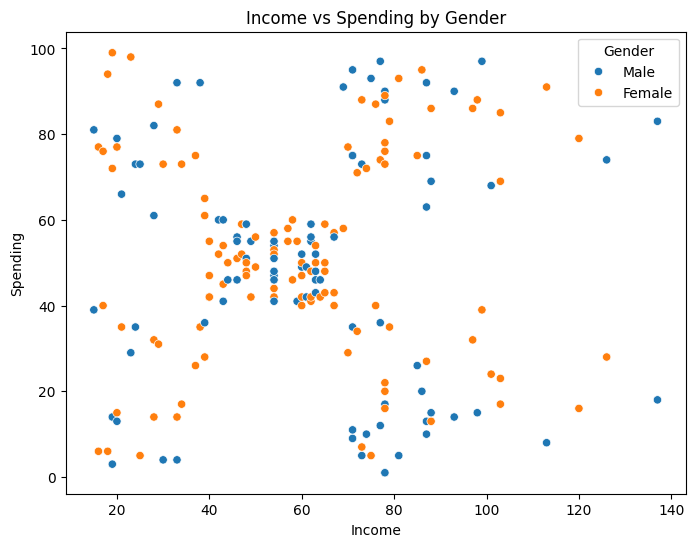

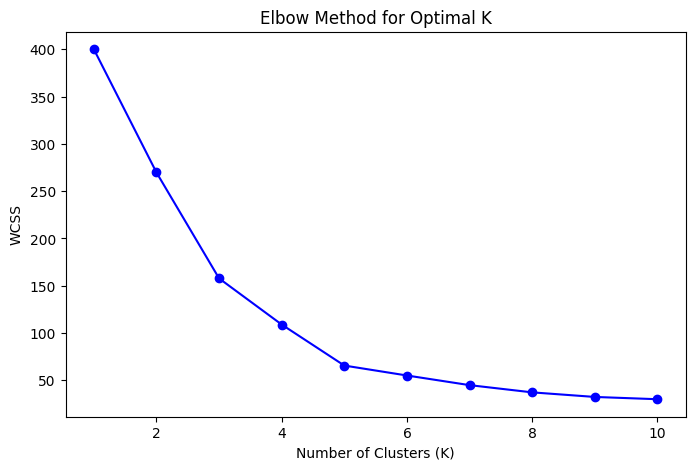

Silhouette Score (K=5): 0.55


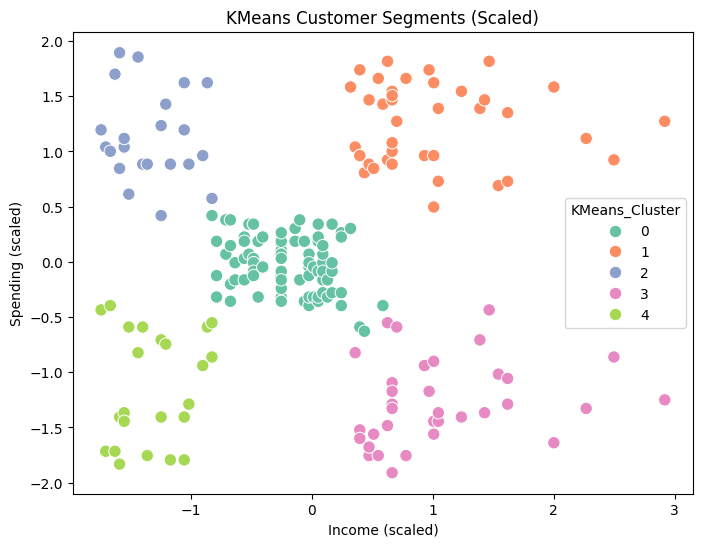

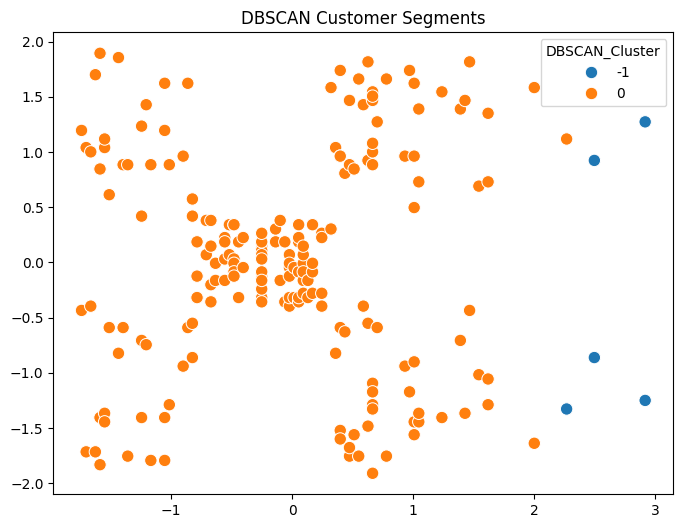


KMeans Cluster Averages:
                   Income   Spending
KMeans_Cluster                      
0               55.296296  49.518519
1               86.538462  82.128205
2               25.727273  79.363636
3               88.200000  17.114286
4               26.304348  20.913043


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Load dataset from working raw gist
url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv"
df = pd.read_csv(url)

# Rename columns for clarity
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Spending'}, inplace=True)

# EDA: scatterplot of Income vs Spending, colored by gender
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Income', y='Spending', hue='Gender')
plt.title("Income vs Spending by Gender")
plt.show()

# Feature selection & scaling
X = df[['Income', 'Spending']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to estimate optimal K
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# KMeans clustering (use K=5 based on elbow)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Silhouette score evaluation
sil_score = silhouette_score(X_scaled, df['KMeans_Cluster'])
print("Silhouette Score (K=5):", round(sil_score, 2))

# Visualize KMeans clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['KMeans_Cluster'], palette='Set2', s=80)
plt.title("KMeans Customer Segments (Scaled)")
plt.xlabel("Income (scaled)")
plt.ylabel("Spending (scaled)")
plt.show()

# Bonus: DBSCAN clustering
db = DBSCAN(eps=0.6, min_samples=5)
df['DBSCAN_Cluster'] = db.fit_predict(X_scaled)

# Visualize DBSCAN clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['DBSCAN_Cluster'], palette='tab10', s=80)
plt.title("DBSCAN Customer Segments")
plt.show()

# Analyze average income & spending per cluster
print("\nKMeans Cluster Averages:")
print(df.groupby('KMeans_Cluster')[['Income','Spending']].mean())
